In [45]:
import pickle5 as pk5
from pathlib import Path

In [38]:
data_dir = Path('/workspace/lld_au_bert')

In [39]:
with open(data_dir/'mosi_of_os_bert.pkl', 'rb') as f:
    data = pk5.load(f)

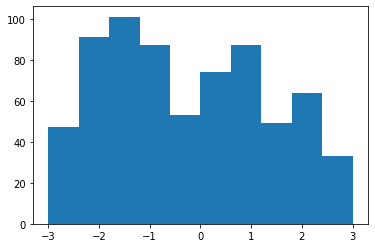

In [47]:
import matplotlib.pyplot as plt

plt.hist(data['test']['labels'][:,0,0])
plt.show()

In [48]:
np.mean(np.abs(data['train']['labels']))

1.3291147455867054

In [44]:
l = data['train']['labels']
l.mean(), l.std()

(0.23448857736240655, 1.5094513614981566)

In [42]:
l = data['valid']['labels']
l.mean(), l.std()

(0.30953420669576415, 1.6492282983348057)

In [43]:
l = data['test']['labels']
l.mean(), l.std()

(-0.3169825072886297, 1.5883847039127468)

In [8]:
type(data)

dict

In [9]:
data.keys()

dict_keys(['train', 'valid', 'test'])

In [10]:
type(data['train'])

dict

In [11]:
data['train'].keys()

dict_keys(['vision', 'text', 'audio', 'labels'])

In [12]:
type(data['train']['vision'])

numpy.ndarray

In [13]:
data['train']['vision'].shape

(1284, 500, 35)

In [14]:
data['train']['text'].shape

(1284, 50, 768)

In [15]:
data['train']['audio'].shape

(1284, 500, 25)

In [16]:
data['train']['labels'].shape

(1284, 1, 1)

# Norm

In [29]:
mods = ["visual", "text", "audio"]


def get_norms(i):
    mod_data = data['train'][i]
    a_list = [mod_data[j,] for j in range(mod_data.shape[0])]
    a_array = np.concatenate(a_list)
    return np.mean(a_array, axis=0), np.std(a_array, axis=0)

In [36]:
a_mean, a_std = get_norms("audio")
v_mean, v_std = get_norms("vision")
# t_mean, t_std = get_norms(2)

np.savez("mosi_norms", a_mean=a_mean, a_std=a_std, v_mean = v_mean, v_std = v_std)

In [34]:
a_mean.shape, v_mean.shape

((25,), (35,))

In [35]:
a_std.shape, v_std.shape

((25,), (35,))